<a href="https://colab.research.google.com/github/naenumtou/dataScienceLab/blob/main/waterfallChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings

from pandas.core.common import SettingWithCopyWarning

# Config display
%config InlineBackend.figure_format = 'retina' #Retina display
plt.style.use('seaborn-deep') #Plot style
warnings.simplefilter(action = 'ignore', category = SettingWithCopyWarning) #Off warning

In [3]:
# Create dataset
data = [
    ['Original transaction', np.nan, np.nan, 98557],
    ['Fraud transaction', 98557, 8561, 89996],
    ['Revise information', 89996, 4530, 85466],
    ['Closed in month', 85466, 3490, 81976],
    ['Write-off', 81976, 7904, 74072],
    ['No rating', 74072, 2390, 71682]
]

# To DataFrame
df = pd.DataFrame(
    data,
    columns = ['Criteria', 'Before', 'Excluded', 'After']
)

# Show table
df

,Criteria,Before,Excluded,After
0,Original transaction,NaN,NaN,98557
1,Fraud transaction,98557.0,8561.0,89996
2,Revise information,89996.0,4530.0,85466
3,Closed in month,85466.0,3490.0,81976
4,Write-off,81976.0,7904.0,74072
5,No rating,74072.0,2390.0,71682


In [4]:
# DataFrame adjustment
df = df.drop(
    ['Excluded'],
    axis = 1
).fillna(
    df['After'][0]
).set_index(
    ['Criteria']
)
df['After'][0] = 0
df.loc['Final'] = df['After'][-1], 0

# Show table
df

,Before,After
Criteria,,
Original transaction,98557.0,0
Fraud transaction,98557.0,89996
Revise information,89996.0,85466
Closed in month,85466.0,81976
Write-off,81976.0,74072
No rating,74072.0,71682
Final,71682.0,0


In [5]:
# Seperated into 2 array
colorArray = df['Before']
whiteArray = df['After']

# Create color plot
colorList = ['firebrick' for i in range(len(colorArray))]
colorList[0] = 'gray'
colorList[-1] = 'teal'

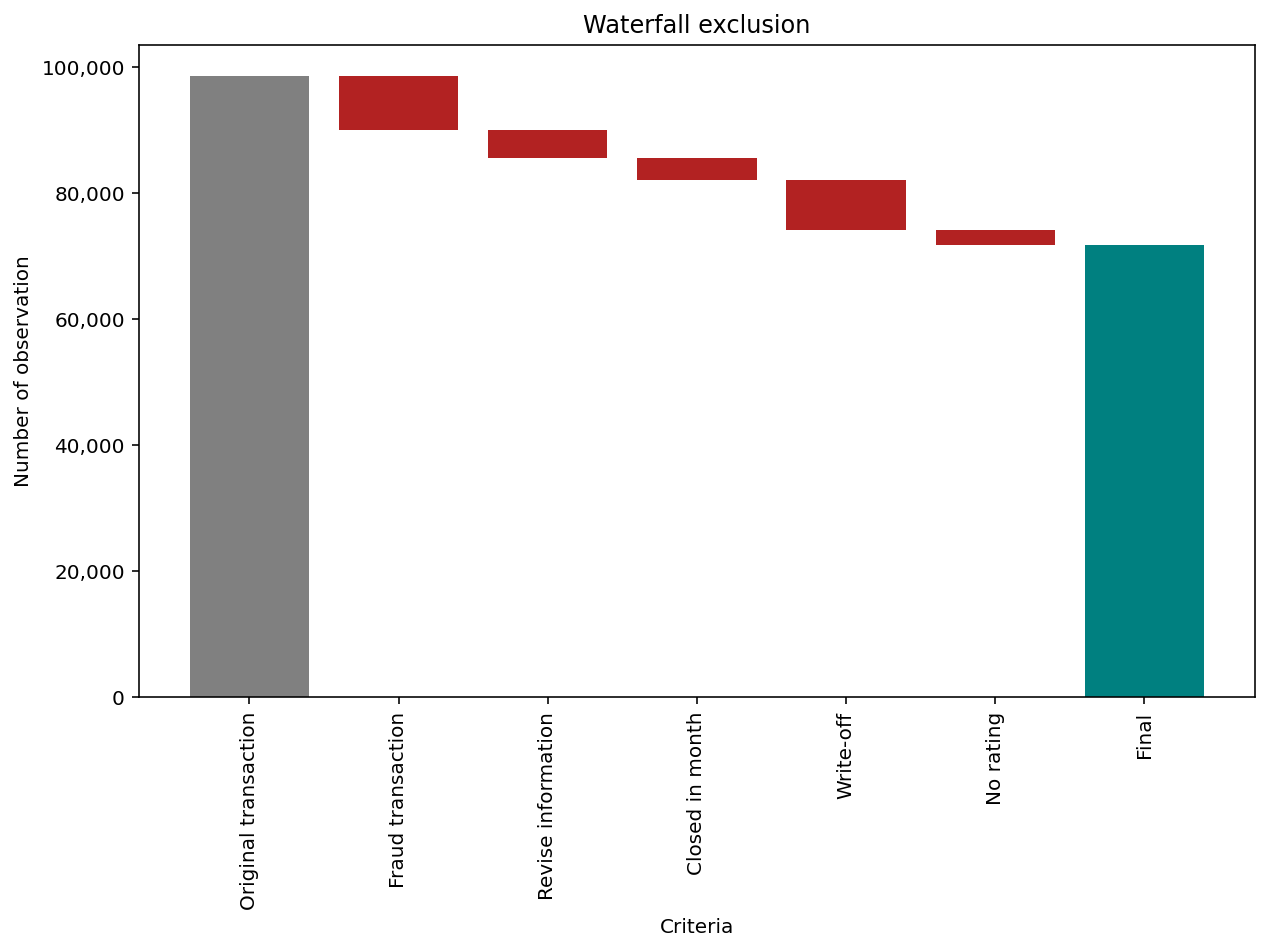

In [6]:
# Plot waterfall
plt.figure(figsize = (10, 6))
plt.bar(
    colorArray.index,
    colorArray,
    color = colorList
)
plt.bar(
    whiteArray.index,
    whiteArray,
    color = 'white'
)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Waterfall exclusion')
plt.xlabel('Criteria')
plt.xticks(rotation = 90)
plt.ylabel('Number of observation')
plt.show()